Data Scientist: John Pan

##### Database Information:

A dataset of 299 patients with heart failure collected in 2015

Thirteen (13) clinical features:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [4]:
import pandas as pd  
import numpy as np 
import os
import seaborn as sns 
import matplotlib.pyplot as plt  
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#!pip install xgboost
from xgboost import XGBRegressor

#!pip install lightgbm
from lightgbm import LGBMRegressor

#ignore warnings
import warnings
warnings.filterwarnings("ignore")

from sklearn import set_config
set_config(print_changed_only = False)
print('setup Completed^__^')

setup Completed^__^


##### import data

In [82]:
os.chdir(r'H:\Cardiac-Failure-Predictive-Modelling-main')
df=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [6]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [7]:
df.shape

(299, 13)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
#change column values
df_eda = pd.DataFrame()

df_eda["age"] = df["age"]
df_eda["anaemia"] = np.where(df["anaemia"] < 1, "no", "yes")
df_eda["creatinine_phosphokinase"] = df["creatinine_phosphokinase"]
df_eda["diabetes"] = np.where(df["diabetes"] < 1, "no", "yes")
df_eda["ejection_fraction"] = df["ejection_fraction"]
df_eda["high_blood_pressure"] = np.where(df["high_blood_pressure"] < 1, "no", "yes")
df_eda["platelets"] = df["platelets"]
df_eda["serum_creatinine"] = df["serum_creatinine"]
df_eda["serum_sodium"] = df["serum_sodium"]
df_eda["sex"] = np.where(df["sex"] < 1, "female", "male")
df_eda["smoking"] = np.where(df["smoking"] < 1, "no", "yes")
df_eda["time"] = df["time"]
df_eda["death_event"] = np.where(df["DEATH_EVENT"] < 1, "no", "yes")

df_eda.head()

age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
0  75.0      no                       582       no                 20   
1  55.0      no                      7861       no                 38   
2  65.0      no                       146       no                 20   
3  50.0     yes                       111       no                 20   
4  65.0     yes                       160      yes                 20   

  high_blood_pressure  platelets  serum_creatinine  serum_sodium     sex  \
0                 yes  265000.00               1.9           130    male   
1                  no  263358.03               1.1           136    male   
2                  no  162000.00               1.3           129    male   
3                  no  210000.00               1.9           137    male   
4                  no  327000.00               2.7           116  female   

  smoking  time death_event  
0      no     4         yes  
1      no     6         yes  
2     yes     7         yes  
3      no     7         yes  
4      no     8         yes

In [13]:
#describe numberic variables in transposed table
df_eda.describe().T

count           mean           std      min  \
age                       299.0      60.833893     11.894809     40.0   
creatinine_phosphokinase  299.0     581.839465    970.287881     23.0   
ejection_fraction         299.0      38.083612     11.834841     14.0   
platelets                 299.0  263358.029264  97804.236869  25100.0   
serum_creatinine          299.0       1.393880      1.034510      0.5   
serum_sodium              299.0     136.625418      4.412477    113.0   
time                      299.0     130.260870     77.614208      4.0   

                               25%       50%       75%       max  
age                           51.0      60.0      70.0      95.0  
creatinine_phosphokinase     116.5     250.0     582.0    7861.0  
ejection_fraction             30.0      38.0      45.0      80.0  
platelets                 212500.0  262000.0  303500.0  850000.0  
serum_creatinine               0.9       1.1       1.4       9.4  
serum_sodium                 134.0     137.0     140.0     148.0  
time                          73.0     115.0     203.0     285.0

In [14]:
#No missing value of the database
df_eda.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

##### data visualization

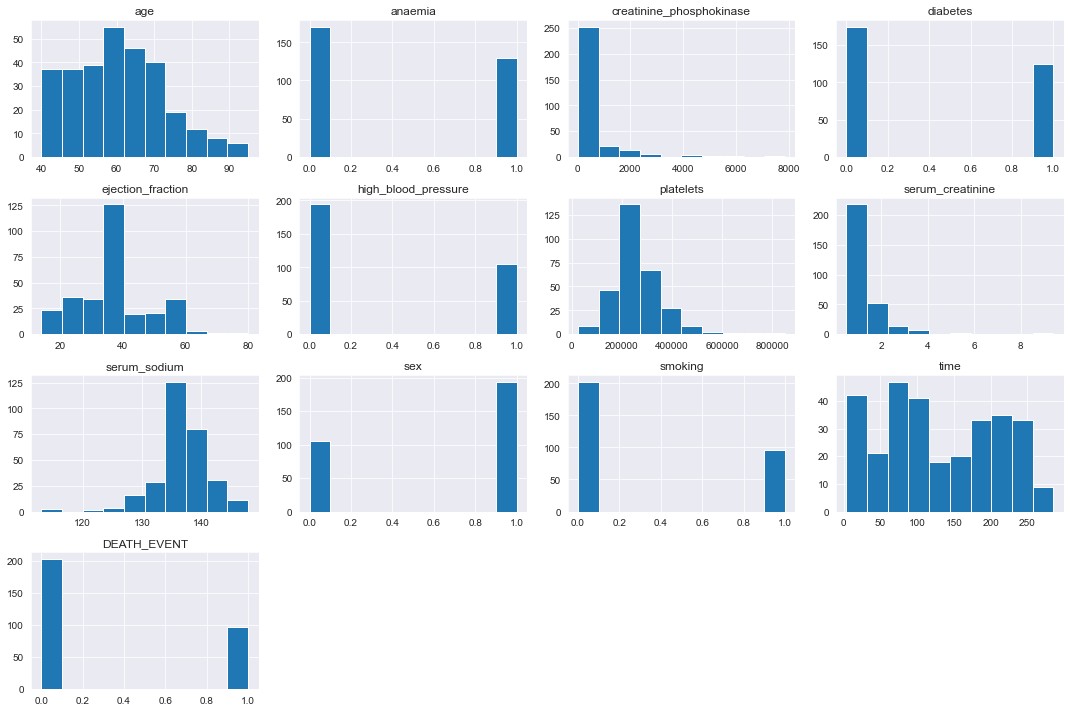

In [83]:
df.hist(bins=10, figsize=(15, 10))
plt.tight_layout()

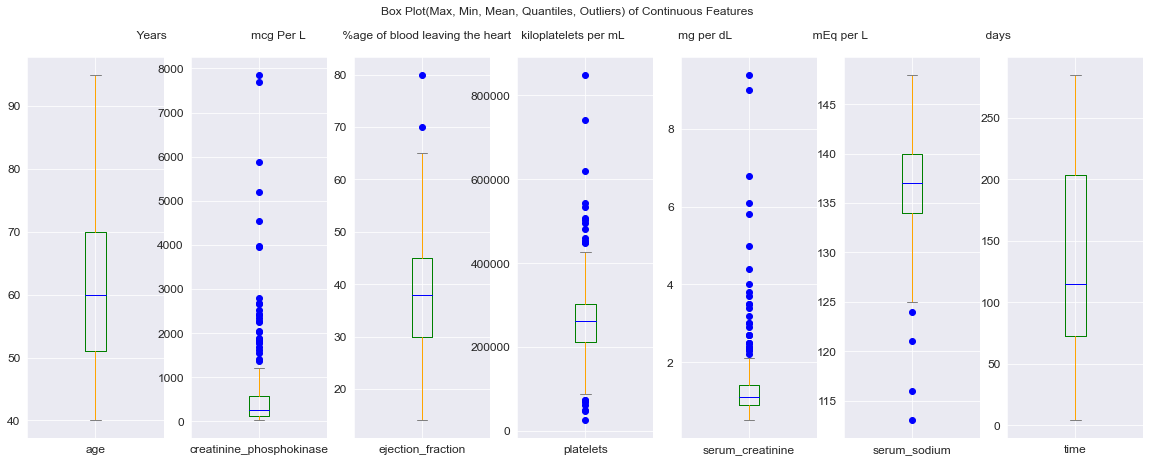

In [18]:
import seaborn as sns
sns.set_style('darkgrid')

color = {
    "boxes": "Green",
    "whiskers": "Orange",
    "medians": "Blue",
    "caps": "Gray"}

df=df_eda[['age', 'creatinine_phosphokinase','ejection_fraction','platelets',
                       'serum_creatinine', 'serum_sodium', 'time']]
df.plot(kind='box',
        figsize=(20,7),
        subplots=True,
        grid=True,
        sym="bo",
        fontsize=12,
        color=color,
        title="Box Plot(Max, Min, Mean, Quantiles, Outliers) of Continuous Features\n\n                          Years                         mcg Per L           %age of blood leaving the heart   kiloplatelets per mL                mg per dL                        mEq per L                                   days                      ")
                                                                                                                                         
plt.savefig('1_1numericColumns')
plt.show()

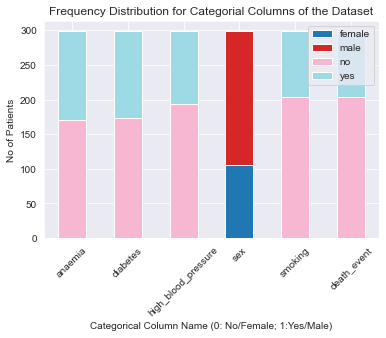

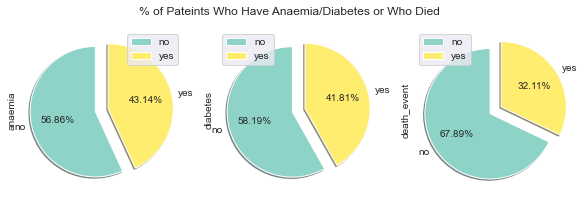

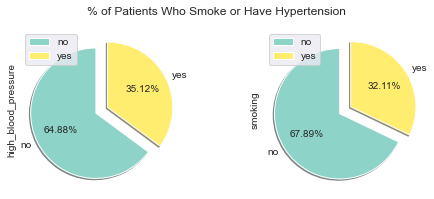

In [22]:
#visualize categorical data
f2_1_2=df_eda[['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']].apply(pd.Series.value_counts).transpose().plot(kind='bar', 
                                                                                stacked=True,
                                                                                title='Frequency Distribution for Categorial Columns of the Dataset',
                                                                                grid=True,
                                                                                ylabel='No of Patients',
                                                                                xlabel='Categorical Column Name (0: No/Female; 1:Yes/Male)',
                                                                                legend={'reverse'},

                                                                                colormap='tab20',
                                                                                rot=45)
plt.savefig('9_2_1_Categorical_Columns_Stacked_Bar_Graph')
plt.show(f2_1_2)

explode=(0.1, 0.1)


f2_1_2=df_eda[['anaemia', 'diabetes','death_event']].apply(pd.Series.value_counts).plot(kind='pie',
                                                    explode=explode,
                                                    stacked=False,
                                                    title='% of Pateints Who Have Anaemia/Diabetes or Who Died',
                                                    legend=True,
                                                    rot=45,
                                                    subplots=True,
                                                    figsize=(10,3),
                                                    autopct="%.2f%%",
                                                    colormap='Set3',
                                                    startangle=90,
                                                    shadow=True,
                                                    labels=['no','yes']) 

plt.savefig('10_2pie1')
plt.show()
                                                                                                                                
                                                                                                                                

f2_1_2=df_eda[['high_blood_pressure', 'smoking']].apply(pd.Series.value_counts).plot(kind='pie',
                                                         stacked=False,
                                                         title='% of Patients Who Smoke or Have Hypertension',
                                                         legend=True,rot=45,
                                                         subplots=True, 
                                                         figsize=(8,3),                                   
                                                         autopct="%.2f%%",                                  
                                                         startangle=90,
                                                         explode=explode,
                                                         colormap='Set3',
                                                         shadow=True,
                                                         labels=['no','yes'])                                  
                                                                                                                                
plt.savefig('11_2pie2')
plt.show()
                            

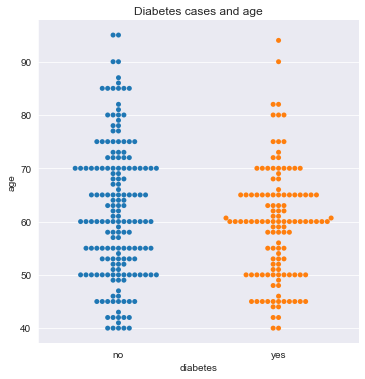

In [23]:
sns.catplot(x = "diabetes",
            y = "age",
            kind = "swarm",
            data = df_eda,
            margin_titles = True).set(title = "Diabetes cases and age");

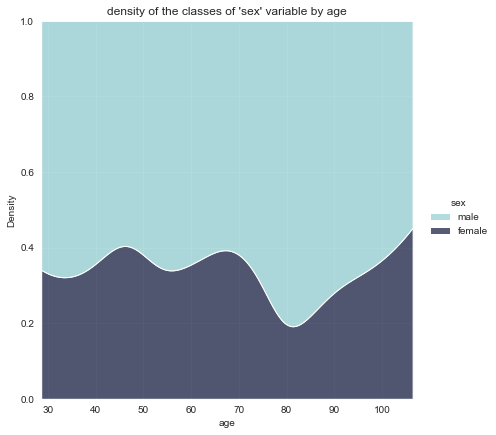

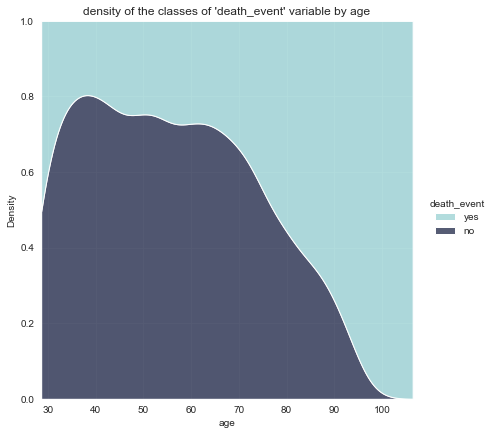

In [24]:
sns.displot(
    data = df_eda,
    x = "age", hue = "sex",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
).set(title = "density of the classes of 'sex' variable by age");


sns.displot(
    data = df_eda,
    x = "age", hue = "death_event",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
).set(title = "density of the classes of 'death_event' variable by age");

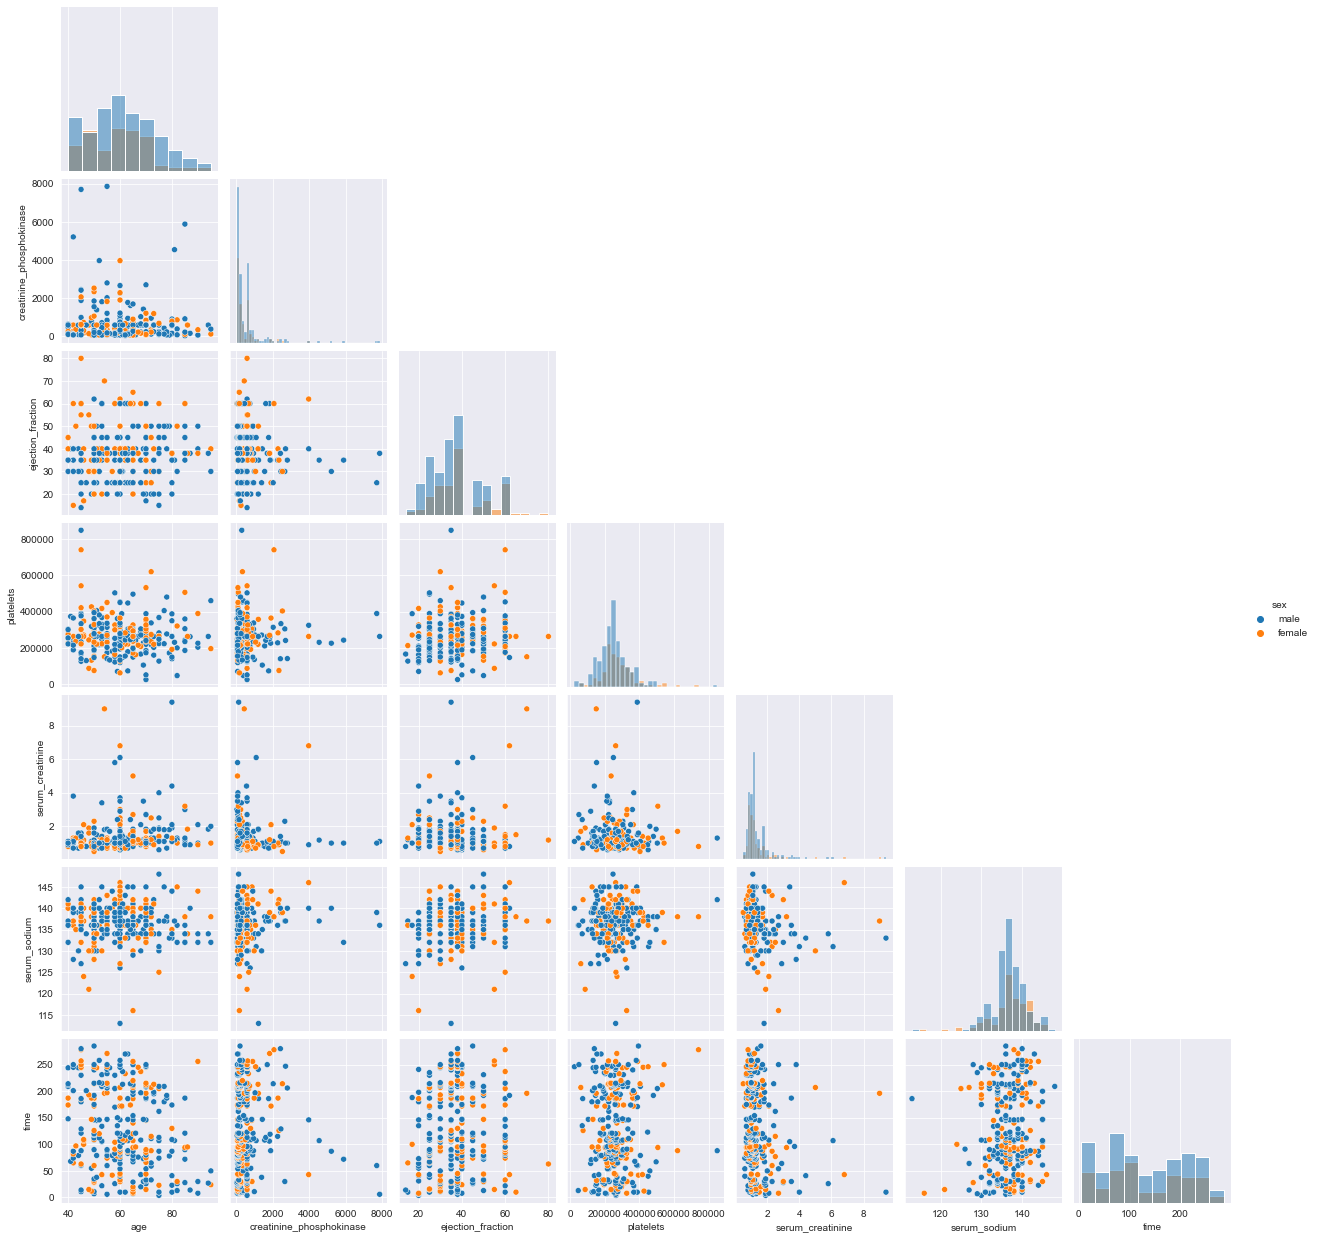

In [25]:
sns.pairplot(df_eda, hue = "sex", diag_kind = "hist", corner = True);

As it can be seen there is not any correlation between the variables



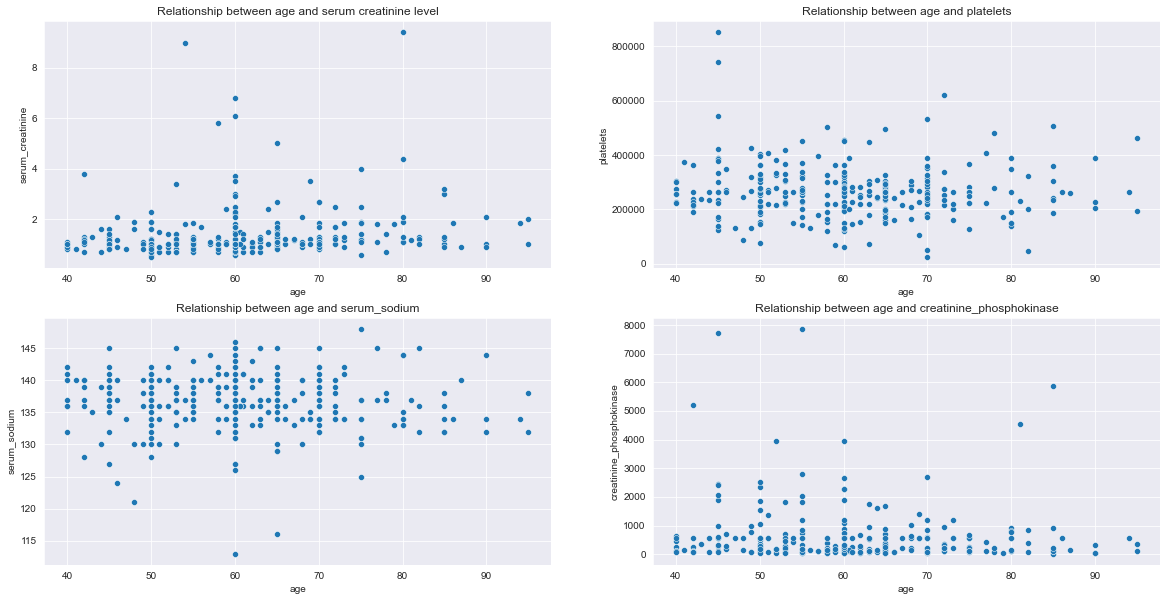

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

sns.scatterplot(ax = axes[0],
                x = "age",
                y = "serum_creatinine",
                data = df_eda).set(title = 'Relationship between age and serum creatinine level');

sns.scatterplot(ax = axes[1],
                x = "age",
                y = "platelets",
                data = df_eda).set(title = 'Relationship between age and platelets');

sns.scatterplot(ax = axes[2],
                x = "age",
                y = "serum_sodium",
                data = df_eda).set(title = 'Relationship between age and serum_sodium');

sns.scatterplot(ax = axes[3],
                x = "age",
                y = "creatinine_phosphokinase",
                data = df_eda).set(title = 'Relationship between age and creatinine_phosphokinase');

print("As it can be seen there is not any correlation between the variables\n")

In [27]:
patient_record_int=pd.read_csv('heart_failure_clinical_records_dataset.csv')
patient_record_int.corr()

age   anaemia  creatinine_phosphokinase  \
age                       1.000000  0.088006                 -0.081584   
anaemia                   0.088006  1.000000                 -0.190741   
creatinine_phosphokinase -0.081584 -0.190741                  1.000000   
diabetes                 -0.101012 -0.012729                 -0.009639   
ejection_fraction         0.060098  0.031557                 -0.044080   
high_blood_pressure       0.093289  0.038182                 -0.070590   
platelets                -0.052354 -0.043786                  0.024463   
serum_creatinine          0.159187  0.052174                 -0.016408   
serum_sodium             -0.045966  0.041882                  0.059550   
sex                       0.065430 -0.094769                  0.079791   
smoking                   0.018668 -0.107290                  0.002421   
time                     -0.224068 -0.141414                 -0.009346   
DEATH_EVENT               0.253729  0.066270                  0.062728   

                          diabetes  ejection_fraction  high_blood_pressure  \
age                      -0.101012           0.060098             0.093289   
anaemia                  -0.012729           0.031557             0.038182   
creatinine_phosphokinase -0.009639          -0.044080            -0.070590   
diabetes                  1.000000          -0.004850            -0.012732   
ejection_fraction        -0.004850           1.000000             0.024445   
high_blood_pressure      -0.012732           0.024445             1.000000   
platelets                 0.092193           0.072177             0.049963   
serum_creatinine         -0.046975          -0.011302            -0.004935   
serum_sodium             -0.089551           0.175902             0.037109   
sex                      -0.157730          -0.148386            -0.104615   
smoking                  -0.147173          -0.067315            -0.055711   
time                      0.033726           0.041729            -0.196439   
DEATH_EVENT              -0.001943          -0.268603             0.079351   

                          platelets  serum_creatinine  serum_sodium       sex  \
age                       -0.052354          0.159187     -0.045966  0.065430   
anaemia                   -0.043786          0.052174      0.041882 -0.094769   
creatinine_phosphokinase   0.024463         -0.016408      0.059550  0.079791   
diabetes                   0.092193         -0.046975     -0.089551 -0.157730   
ejection_fraction          0.072177         -0.011302      0.175902 -0.148386   
high_blood_pressure        0.049963         -0.004935      0.037109 -0.104615   
platelets                  1.000000         -0.041198      0.062125 -0.125120   
serum_creatinine          -0.041198          1.000000     -0.189095  0.006970   
serum_sodium               0.062125         -0.189095      1.000000 -0.027566   
sex                       -0.125120          0.006970     -0.027566  1.000000   
smoking                    0.028234         -0.027414      0.004813  0.445892   
time                       0.010514         -0.149315      0.087640 -0.015608   
DEATH_EVENT               -0.049139          0.294278     -0.195204 -0.004316   

                           smoking      time  DEATH_EVENT  
age                       0.018668 -0.224068     0.253729  
anaemia                  -0.107290 -0.141414     0.066270  
creatinine_phosphokinase  0.002421 -0.009346     0.062728  
diabetes                 -0.147173  0.033726    -0.001943  
ejection_fraction        -0.067315  0.041729    -0.268603  
high_blood_pressure      -0.055711 -0.196439     0.079351  
platelets                 0.028234  0.010514    -0.049139  
serum_creatinine         -0.027414 -0.149315     0.294278  
serum_sodium              0.004813  0.087640    -0.195204  
sex                       0.445892 -0.015608    -0.004316  
smoking                   1.000000 -0.022839    -0.012623  
time                     -0.022839  1.000000  

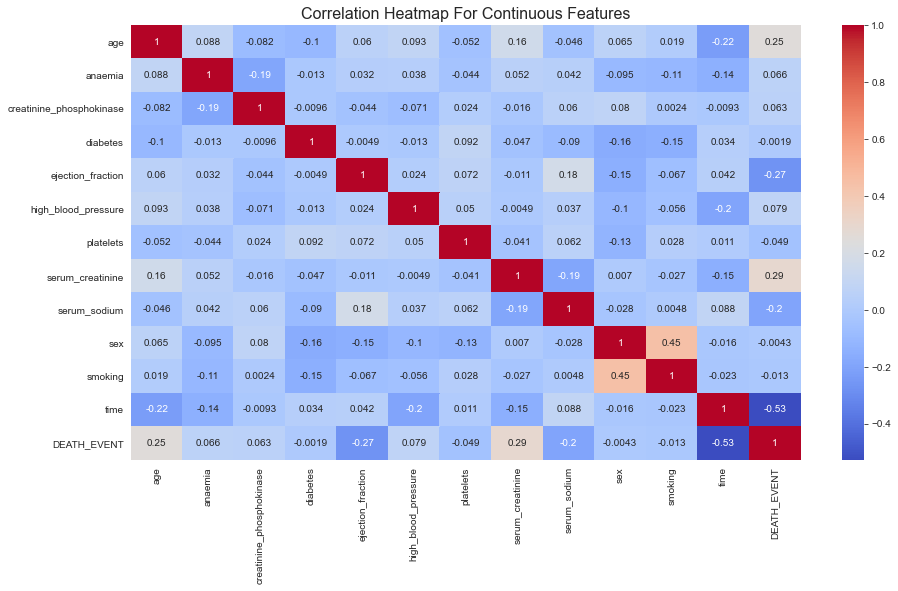

In [28]:
plt.figure(figsize=(15,8))
plt.title('Correlation Heatmap For Continuous Features', fontsize=16)

sns.heatmap(patient_record_int.corr(), annot=True, cmap='coolwarm')

plt.savefig('12_correlation_heatmap')
plt.show()

No correlation between continous variables

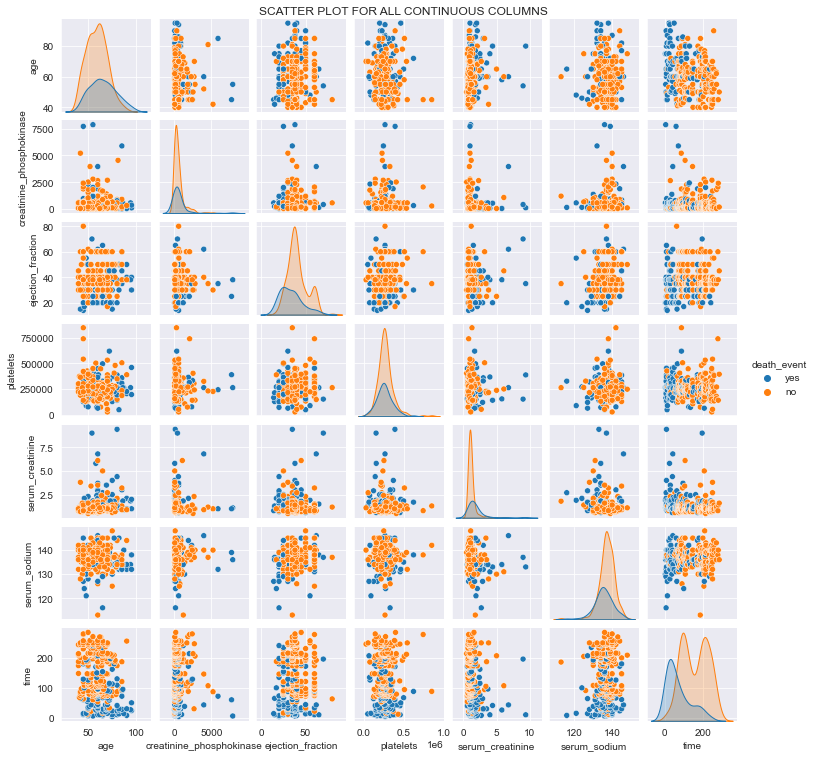

In [30]:
##Scatter Plot to Explore Relationship Between All Continous/Numeric Columns and DEATH_EVENT column:
df1=df_eda[['age', 'creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine', 
                        'serum_sodium', 'time','death_event']]

g=sns.pairplot(df1, height=1.5, hue='death_event')

g.fig.suptitle("SCATTER PLOT FOR ALL CONTINUOUS COLUMNS", y=1)
plt.savefig('13_SCATTER PLOT')
plt.show()



In [33]:
patient_record=pd.read_csv('heart_failure_clinical_records_dataset.csv')
patient_age=patient_record.copy(deep=True) #making a copy of the dataframe
patient_age['sex'].replace(0,'Female', inplace=True)
patient_age['sex'].replace(1,'Male', inplace=True)
patient_age['anaemia'].replace(0,'Non-Anaemic', inplace=True)
patient_age['anaemia'].replace(1,'Anaemic', inplace=True)
patient_age['high_blood_pressure'].replace(1,'Hypertensive', inplace=True)
patient_age['high_blood_pressure'].replace(0,'Non-Hypertensive', inplace=True)
patient_age['smoking'].replace(1,'Smoking', inplace=True)
patient_age['smoking'].replace(0,'Non-Smoking', inplace=True)
patient_age['diabetes'].replace(1,'Diabetic', inplace=True)
patient_age['diabetes'].replace(0,'Non-Diabetic', inplace=True)

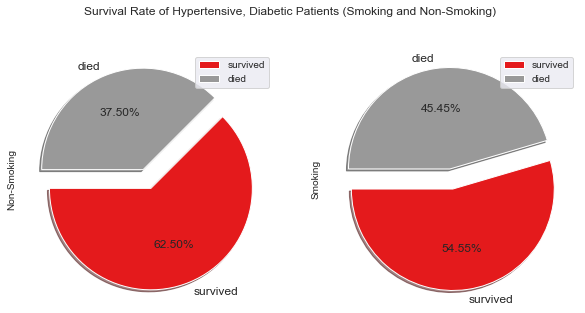

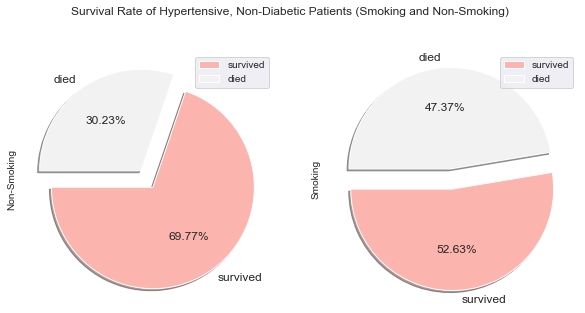

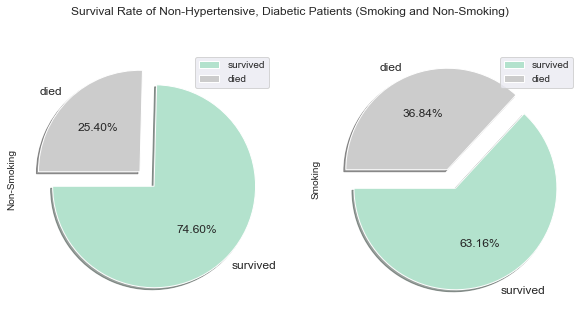

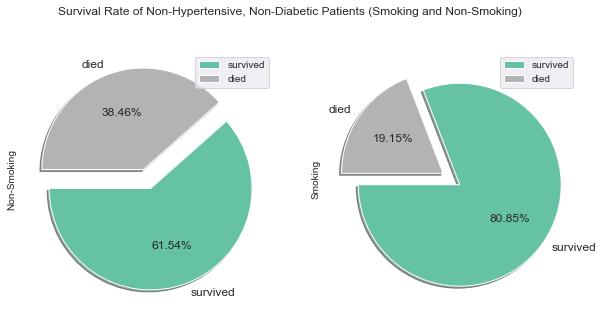

In [35]:
explode=(0.1,0.1)
grpbyobj=patient_age[(patient_age['high_blood_pressure']=='Hypertensive') & (patient_age['diabetes']=='Diabetic')].groupby('smoking')
fig2_3=grpbyobj['DEATH_EVENT'].value_counts().unstack().transpose().plot(kind='pie',
                                                                         subplots=True, 
                                                                         startangle=180,
                                                                         shadow=True,
                                                                         colormap='Set1', 
                                                                         autopct='%.2f%%', 
                                                                         labels=['survived','died'], 
                                                                         explode=explode, 
                                                                         figsize=(10,5),
                                                                         title='Survival Rate of Hypertensive, Diabetic Patients (Smoking and Non-Smoking)',
                                                                         fontsize=12)
plt.savefig('22_SurvivalRate2_3_MeaningfulQuestion')
plt.show()

explode=(0.1,0.1)
grpbyobj=patient_age[(patient_age['high_blood_pressure']=='Hypertensive') & (patient_age['diabetes']=='Non-Diabetic')].groupby('smoking')
fig2_3_2=grpbyobj['DEATH_EVENT'].value_counts().unstack().transpose().plot(kind='pie',
                                                                         subplots=True, 
                                                                         startangle=180,
                                                                         shadow=True,
                                                                         colormap='Pastel1', 
                                                                         autopct='%.2f%%', 
                                                                         labels=['survived','died'], 
                                                                         explode=explode, 
                                                                         figsize=(10,5),
                                                                         title='Survival Rate of Hypertensive, Non-Diabetic Patients (Smoking and Non-Smoking)',
                                                                         fontsize=12)
plt.savefig('23_SurvivalRate2_3_MeaningfulQuestion2')
plt.show()


explode=(0.1,0.1)
grpbyobj=patient_age[(patient_age['high_blood_pressure']=='Non-Hypertensive') & (patient_age['diabetes']=='Diabetic')].groupby('smoking')
fig2_3_3=grpbyobj['DEATH_EVENT'].value_counts().unstack().transpose().plot(kind='pie',
                                                                         subplots=True, 
                                                                         startangle=180,
                                                                         shadow=True,
                                                                         colormap='Pastel2', 
                                                                         autopct='%.2f%%', 
                                                                         labels=['survived','died'], 
                                                                         explode=explode, 
                                                                         figsize=(10,5),
                                                                         title='Survival Rate of Non-Hypertensive, Diabetic Patients (Smoking and Non-Smoking)',
                                                                         fontsize=12)
plt.savefig('24_SurvivalRate2_3_MeaningfulQuestion3')
plt.show()

explode=(0.1,0.1)
grpbyobj=patient_age[(patient_age['high_blood_pressure']=='Non-Hypertensive') & (patient_age['diabetes']=='Non-Diabetic')].groupby('smoking')
fig2_3_4=grpbyobj['DEATH_EVENT'].value_counts().unstack().transpose().plot(kind='pie',
                                                                         subplots=True, 
                                                                         startangle=180, 
                                                                         shadow=True,
                                                                         colormap='Set2', 
                                                                         autopct='%.2f%%', 
                                                                         labels=['survived','died'], 
                                                                         explode=explode, 
                                                                         figsize=(10,5),
                                                                         title='Survival Rate of Non-Hypertensive, Non-Diabetic Patients (Smoking and Non-Smoking)',
                                                                         fontsize=12)
plt.savefig('25_SurvivalRate2_3_MeaningfulQuestion4')
plt.show()


In [63]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Pie(labels=df["DEATH_EVENT"].value_counts(normalize=True).index,
                     values=100*df["DEATH_EVENT"].value_counts(normalize=True).values,
                     marker=dict(line=dict(width=2.5)), textfont_size=15,
                     hole=.40, hovertemplate="Death Event: %{value:.2f}%<extra></extra>"))

fig.update_layout(title="Target Variable Distribution",
                  width=800, legend=dict(x=0.1, y=1.05))
fig.show()

##### Database processing and preparation for machine learning

In [38]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [39]:
#Select Dependent and Independent Variables
# we select dependent variable (label)
y = df["DEATH_EVENT"]

# we select independent variable
x = df.drop("DEATH_EVENT", axis = 1)

In [40]:
#Split Dataset into Train and Test Sets
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 1)

Standardization

Standardizing the features around the center and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bais.

In [41]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [42]:
x_train[0:5]

array([[-1.33194278,  1.11069566, -0.4576634 , -0.84818893, -0.24318058,
        -0.72269841, -0.89319445, -0.58084862,  0.51465589,  0.72941845,
         1.52297224, -0.10575054],
       [-0.4999137 , -0.90033664, -0.51894319, -0.84818893,  0.17737049,
        -0.72269841, -0.57954879, -0.39670905,  0.29500811,  0.72941845,
        -0.65661079,  1.33189826],
       [ 0.58172409,  1.11069566,  0.39546617,  1.17898261, -0.24318058,
        -0.72269841,  0.15589621, -0.30463927, -0.58358301,  0.72941845,
        -0.65661079,  0.86979686],
       [-0.08389917,  1.11069566, -0.02487488, -0.84818893, -0.66373165,
         1.38370306, -1.40151673, -0.48877884,  1.83254257, -1.37095517,
        -0.65661079, -0.43949044],
       [-0.08389917, -0.90033664, -0.35712624,  1.17898261,  0.00915007,
        -0.72269841,  0.78318753,  1.44468663,  1.17359923, -1.37095517,
        -0.65661079, -1.27384019]])

In [43]:
x_test[0:5]

array([[-0.91592824,  1.11069566, -0.47202585, -0.84818893, -1.5048338 ,
        -0.72269841, -0.73096394, -0.58084862,  0.51465589,  0.72941845,
        -0.65661079,  0.21515321],
       [-1.33194278, -0.90033664, -0.02487488,  1.17898261,  1.43902371,
        -0.72269841,  3.09767621, -0.39670905, -1.02287857, -1.37095517,
        -0.65661079,  1.55011281],
       [-0.66631952,  1.11069566, -0.49500577, -0.84818893, -1.5048338 ,
         1.38370306,  1.74575525, -0.02842992,  0.51465589, -1.37095517,
        -0.65661079, -1.10697024],
       [-0.74952242, -0.90033664, -0.4557484 , -0.84818893, -0.66373165,
        -0.72269841, -0.41731828, -0.67291841, -0.14428745,  0.72941845,
         1.52297224, -0.22127589],
       [ 0.33211537,  1.11069566, -0.45287591, -0.84818893, -0.24318058,
         1.38370306,  0.36138819, -0.58084862, -0.58358301,  0.72941845,
        -0.65661079,  0.83128841]])

##### Random Forests Model

In [44]:
rf = RandomForestClassifier()

In [50]:
#Hyperparameter Tuning
#parametres for search
rf_params = {"max_depth": [3, 5, 8, 10],
             "max_features": [3, 5, 8, 10],
             "n_estimators": [10, 500, 1000],
             "min_samples_split": [2, 5, 10]}

# Search the best parametres with GridSearchCV() function
rf_cv_model = GridSearchCV(rf, rf_params, cv = 10, n_jobs = -1)
rf_cv_model.fit(x_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [46]:
#Get Best Parameters
rf_cv_model.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_split': 5,
 'n_estimators': 500}

In [47]:
#Build Model with Best Parameters
rf_model = RandomForestClassifier(n_estimators = rf_cv_model.best_params_["n_estimators"],
                                max_depth = rf_cv_model.best_params_["max_depth"],
                                max_features = rf_cv_model.best_params_["max_features"],
                                min_samples_split = rf_cv_model.best_params_["min_samples_split"])
rf_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [48]:
#Accuracy Score of Model on Test Set
y_pred = rf_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.9333333333333333

Text(0, 0.5, 'Variables')

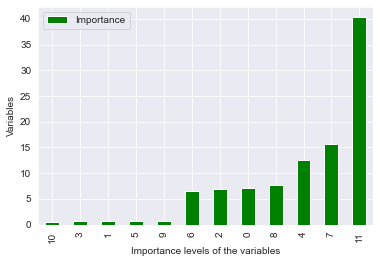

In [49]:
#Importance Levels of the Variables
importance = pd.DataFrame({"Importance": rf_model.feature_importances_ * 100},
                         index = pd.DataFrame(x_train).columns)
importance.sort_values(by = "Importance",
                       axis = 0,
                       ascending = True).plot(kind = "bar", color = "green")
plt.xlabel("Importance levels of the variables")
plt.ylabel("Variables")

In [51]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        46
           1       0.92      0.79      0.85        14

    accuracy                           0.93        60
   macro avg       0.93      0.88      0.90        60
weighted avg       0.93      0.93      0.93        60



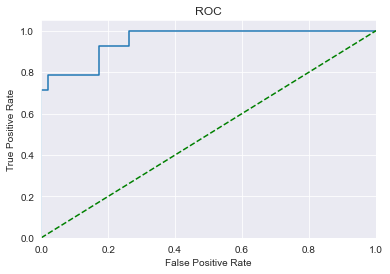

In [52]:
#ROC AUC - Random Forests
rf_roc_auc = roc_auc_score(y_test, rf_model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, rf_model.predict_proba(x_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'g--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

[[45  1]
 [ 3 11]]


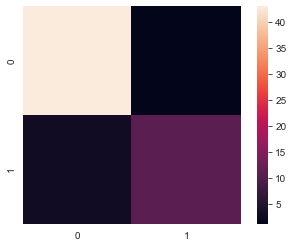

In [53]:
#Confusion Matrix Visualization
# Visualization Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

# Visualize it as a heatmap
import seaborn
seaborn.heatmap(conf_mat, square = True, robust = True)
plt.show()

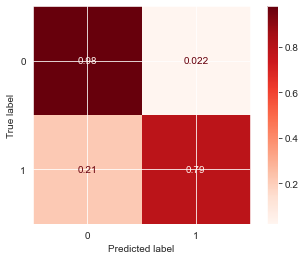

In [54]:
plot_confusion_matrix(rf_model,
                      x_test,
                      y_test,
                      cmap = plt.cm.Reds,
                      normalize='true');

##### Logistic Regression

In [56]:
# build a model

log = LogisticRegression(solver = "liblinear")
log_model = log.fit(x_train, y_train)
log_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
#Accuracy Score of Model on Test Set
y_pred = log_model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8833333333333333

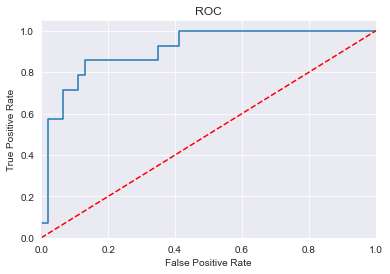

In [59]:
#ROC AUC - Logistic Regression
log_roc_auc = roc_auc_score(y_test, log_model.predict(x_test))

fpr, tpr, thresholds = roc_curve(y_test, log_model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label = 'AUC (area = %0.2f)' % log_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()